In [2]:
"""***************************** 25th mar'23 Assignment *****************************"""

"***************************** 25th mar'23 Assignment *****************************"

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Flight Price:

#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
df_flight = pd.read_excel('flight_price.xlsx')

In [3]:
# Number of rows and columns in dataframe
num_rows, num_cols = df_flight.shape
print(f'Number of rows in flight dataset is ---> {num_rows}')
print(f'Number of columns in flight dataset is ---> {num_cols}')

Number of rows in flight dataset is ---> 10683
Number of columns in flight dataset is ---> 11


#### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

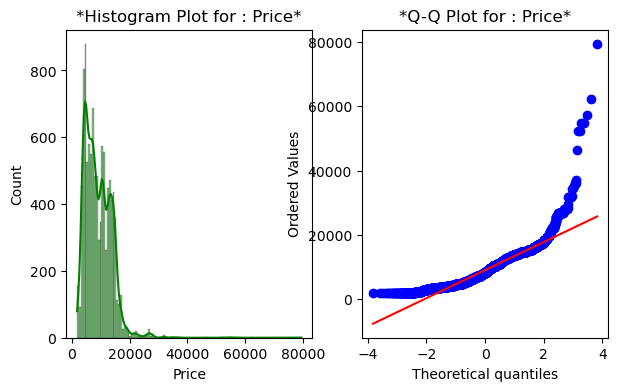

In [150]:
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(7,4))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True,color='green')
    plt.title(f'*Histogram Plot for : {feature}*')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'*Q-Q Plot for : {feature}*')
    plt.show()
qq_plot(df_flight,'Price')

#### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
df_flight[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
max_price = df_flight['Price'].max()
min_price = df_flight['Price'].min()
range_price = max_price - min_price
print(f'Maximum Price of Flight is : {max_price}')
print(f'Minimum Price of Flight is : {min_price}')
print(f'Range of price is : {range_price}')

Maximum Price of Flight is : 79512
Minimum Price of Flight is : 1759
Range of price is : 77753


#### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

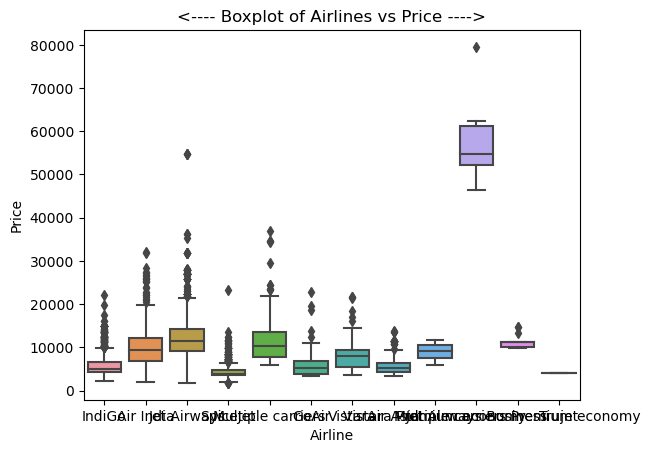

In [7]:
sns.boxplot(data=df_flight, x='Airline', y='Price')
plt.title('<---- Boxplot of Airlines vs Price ---->')
plt.show()

#### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

***Ans.***

yes, there any outliers in the dataset

A boxplot is a graphical representation of the distribution of a dataset based on five summary statistics: minimum value, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum value. It also displays any potential outliers in the dataset, which are defined as observations that are more than 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile.

In [8]:
import numpy as np
from scipy.stats import iqr

minimum,Q1,Q2,Q3,maximum = np.quantile(df_flight['Price'],[0,0.25,0.50,0.75,1.0])
IQR = Q3 -Q1

In [11]:
print("IQR:",IQR )
print("Lower Box :",Q1-1.5*IQR)
print("Upper Box :",Q3 + 1.5*IQR)
print("Max Price :",maximum)
print("Min Price :",minimum)

IQR: 7096.0
Lower Box : -5367.0
Upper Box : 23017.0
Max Price : 79512.0
Min Price : 1759.0


In [12]:
df_flight[df_flight.Price > Q3 + 1.5*IQR]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

/tmp/ipykernel_84/2952844801.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_84/2952844801.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_84/2952844801.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<AxesSubplot: xlabel='Price', ylabel='Count'>

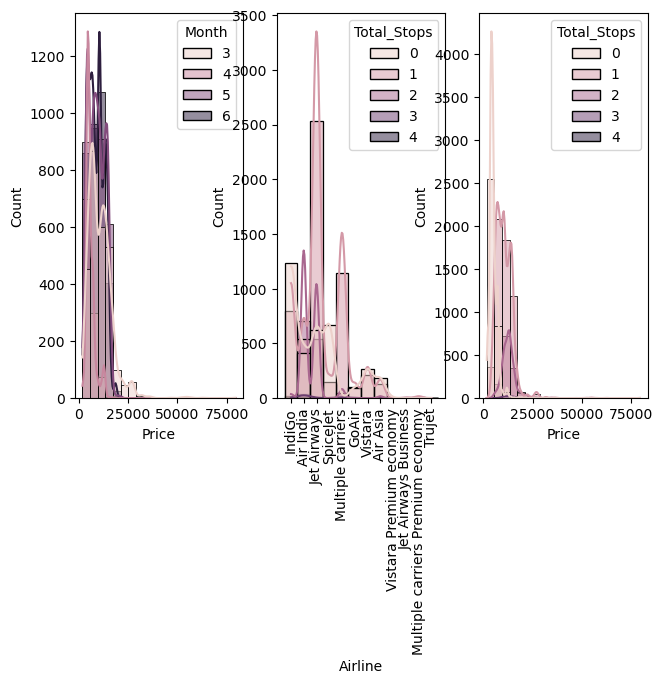

In [149]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,3,figsize = (10,5))
plt.subplot(141)
sns.histplot(data=df_flight,x='Price',bins=20,kde=True,hue='Month')
plt.subplot(142)
sns.histplot(data=df_flight,x='Airline',bins=20,kde=True,hue='Total_Stops')
plt.xticks(rotation=90)
plt.subplot(143)
sns.histplot(data=df_flight,x='Price',bins=20,kde=True,hue='Total_Stops')

### Insights:
 - Cheapest Price is in Month of April.
 - Most of the flight stopapge is 1-stop.
 - Non-stop fliht is morer expansive.
 

#### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [24]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values()

/tmp/ipykernel_84/1563325014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flight.groupby(by='Airline').mean()['Price'].sort_values()


Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

/tmp/ipykernel_84/4059216207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='pie',autopct='%1.1f')


<AxesSubplot: ylabel='Price'>

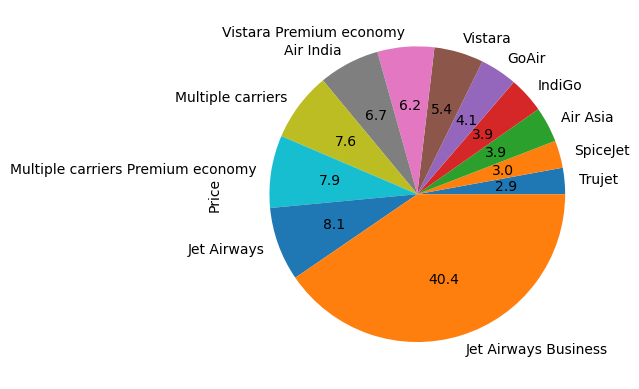

In [26]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='pie',autopct='%1.1f')

***Insights*** :
- Truejet Flights are cheapest
- Jet Airways Business Flight arer expansive            

<AxesSubplot: >

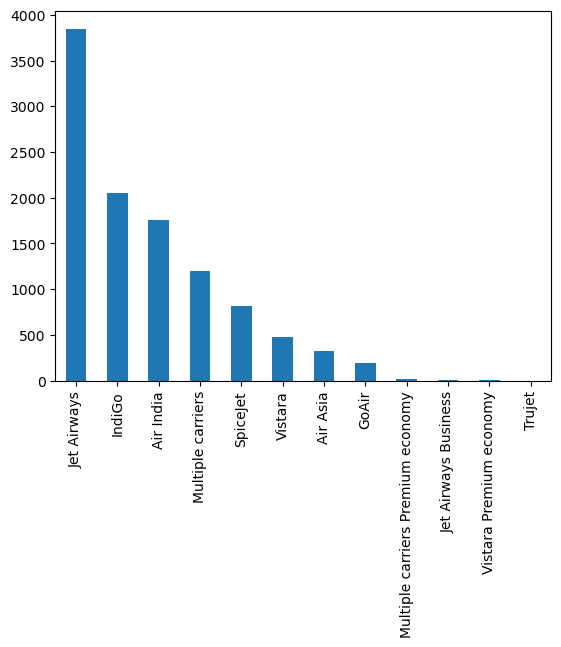

In [34]:
df_flight['Airline'].value_counts().plot(kind='bar')

***Insights*** :
- Jet Airways more people Trravel

#### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

##### Ans>

***To identify the factors that affect flight prices, I would start by analyzing the following features in the Flight Price dataset:***
 - Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

- Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

- Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

- Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

- Other factors: There may be other features in the dataset that could affect flight prices, such as the type of aircraft used, the length of the flight, or the class of service.

In [35]:
df_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [36]:
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [38]:
df_flight['Date'] = df_flight['Date_of_Journey'].str.split('/').str[0]
df_flight['Month'] = df_flight['Date_of_Journey'].str.split('/').str[1]
df_flight['Year'] = df_flight['Date_of_Journey'].str.split('/').str[2]
df_flight['Date'] = df_flight['Date'].astype(int)
df_flight['Month'] = df_flight['Month'].astype(int)
df_flight['Year'] = df_flight['Year'].astype(int)
df_flight.drop('Date_of_Journey',axis=1,inplace=True)
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [39]:
df_flight['Arrival_hours'] = df_flight['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df_flight['Arrival_min'] = df_flight['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df_flight.drop('Arrival_Time',axis=1,inplace=True)
df_flight['Arrival_hours'] = df_flight['Arrival_hours'].astype(int)
df_flight['Arrival_min'] = df_flight['Arrival_min'].astype(int)


df_flight['Dept_hour']=df_flight['Dep_Time'].str.split(':').str[0]
df_flight['Dept_min']=df_flight['Dep_Time'].str.split(':').str[1]
df_flight['Dept_hour']=df_flight['Dept_hour'].astype(int)
df_flight['Dept_min']=df_flight['Dept_min'].astype(int)
df_flight.drop('Dep_Time',axis=1,inplace=True)
df_flight.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [41]:
df_flight['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [42]:
df_flight['Total_Stops']=df_flight['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [43]:
df_flight.duplicated().sum()

222

In [48]:
df_flight.drop('Route',axis=1,inplace=True)

In [49]:
df_flight = df_flight.drop_duplicates(keep='first')

In [50]:
# Save Clean File as csv
df_flight.to_csv('flight_cleaned_dataset.csv')

In [51]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10461 non-null  object
 1   Source           10461 non-null  object
 2   Destination      10461 non-null  object
 3   Duration         10461 non-null  object
 4   Total_Stops      10461 non-null  int64 
 5   Additional_Info  10461 non-null  object
 6   Price            10461 non-null  int64 
 7   Date             10461 non-null  int64 
 8   Month            10461 non-null  int64 
 9   Year             10461 non-null  int64 
 10  Arrival_hours    10461 non-null  int64 
 11  Arrival_min      10461 non-null  int64 
 12  Dept_hour        10461 non-null  int64 
 13  Dept_min         10461 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.2+ MB


#### Feature Engg.

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded = encoder.fit_transform(df_flight[['Airline','Source','Destination','Additional_Info']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [60]:
pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10458,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
# Seperating X and Y
X = df_flight.drop(labels=['Price'],axis=1)
Y = df_flight[['Price']]

In [62]:
# Seperating Numeric and Categorical Features
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print(f'Numerical Features : {num_cols}')
print(f'Categorical Features : {cat_cols}')

Numerical Features : ['Total_Stops', 'Date', 'Month', 'Year', 'Arrival_hours', 'Arrival_min', 'Dept_hour', 'Dept_min']
Categorical Features : ['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info']


In [63]:
# One Hot Encoding of Categorical Variables
X_cat = pd.get_dummies(X[cat_cols])
X_cat.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# Concatenating Num and Cat variables
X_concat = pd.concat([X[num_cols],X_cat],axis=1)
X_concat.head()

,Total_Stops,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min,Airline_Air Asia,Airline_Air India,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,2019,1,10,22,20,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,5,2019,13,15,5,50,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,9,6,2019,4,25,9,25,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,12,5,2019,23,30,18,5,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,3,2019,21,35,16,50,0,0,...,0,0,0,0,0,0,0,0,1,0


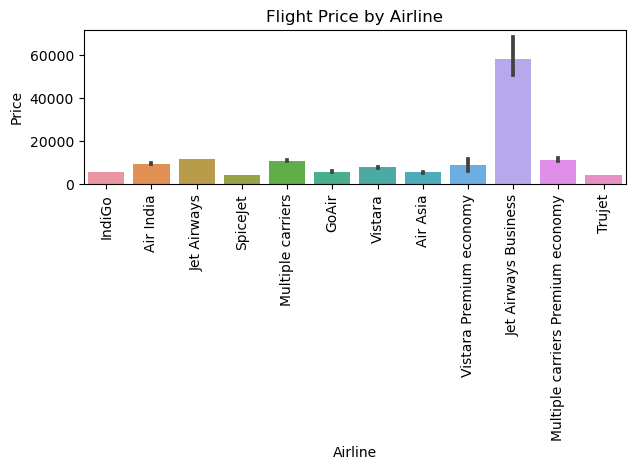

In [148]:
plt.figure(figsize=(7,2))
sns.barplot(x='Airline',y='Price',data=df_flight)
plt.title('Flight Price by Airline')
plt.xticks(rotation=90)
plt.show()

## Google Playstore:

#### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
import pandas as pd
df_play=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df_play.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [79]:
rows , columns = df_play.shape
print(f'Number of rows in Google Playstore dataset : {rows}')
print(f'Number of columns in Google Playstore dataset : {columns}')

Number of rows in Google Playstore dataset : 10841
Number of columns in Google Playstore dataset : 13


#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

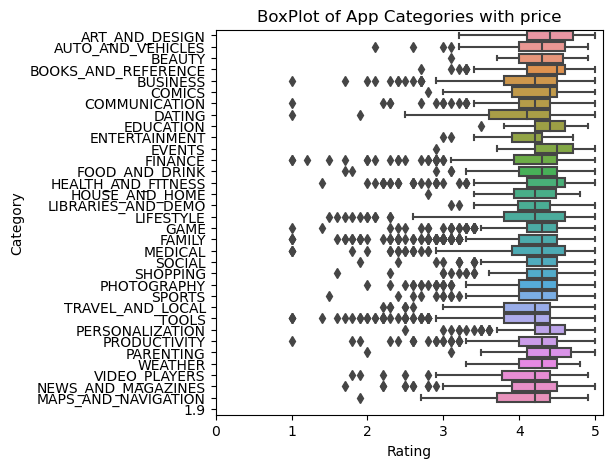

In [147]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.boxplot(data=df_play,x='Rating',y='Category')
plt.xlim([0,5.1])
plt.title('BoxPlot of App Categories with price')
plt.show()

In [81]:
df_play.groupby(by='Category').describe()

Rating                                                   \
                      count       mean       std   min     25%   50%     75%   
Category                                                                       
1.9                     1.0  19.000000       NaN  19.0  19.000  19.0  19.000   
ART_AND_DESIGN         62.0   4.358065  0.358297   3.2   4.100   4.4   4.700   
AUTO_AND_VEHICLES      73.0   4.190411  0.543692   2.1   4.000   4.3   4.600   
BEAUTY                 42.0   4.278571  0.362603   3.1   4.000   4.3   4.575   
BOOKS_AND_REFERENCE   178.0   4.346067  0.429046   2.7   4.100   4.5   4.600   
BUSINESS              303.0   4.121452  0.624422   1.0   3.900   4.3   4.500   
COMICS                 58.0   4.155172  0.537758   2.8   3.825   4.4   4.500   
COMMUNICATION         328.0   4.158537  0.426192   1.0   4.000   4.3   4.400   
DATING                195.0   3.970769  0.630510   1.0   3.700   4.1   4.400   
EDUCATION             155.0   4.389032  0.251894   3.5   4.200   4.4   4.600   
ENTERTAINMENT         149.0   4.126174  0.302556   3.0   3.900   4.2   4.300   
EVENTS                 45.0   4.435556  0.419499   2.9   4.200   4.5   4.700   
FAMILY               1747.0   4.192272  0.508026   1.0   4.000   4.3   4.500   
FINANCE               323.0   4.131889  0.642108   1.0   4.000   4.3   4.500   
FOOD_AND_DRINK        109.0   4.166972  0.548070   1.7   4.000   4.3   4.500   
GAME                 1097.0   4.286326  0.365375   1.0   4.100   4.4   4.500   
HEALTH_AND_FITNESS    297.0   4.277104  0.617822   1.4   4.100   4.5   4.600   
HOUSE_AND_HOME         76.0   4.197368  0.368411   2.8   4.000   4.3   4.500   
LIBRARIES_AND_DEMO     65.0   4.178462  0.378522   3.1   4.000   4.2   4.400   
LIFESTYLE             314.0   4.094904  0.693907   1.5   3.800   4.2   4.600   
MAPS_AND_NAVIGATION   124.0   4.051613  0.519926   1.9   3.775   4.2   4.400   
MEDICAL               350.0   4.189143  0.663581   1.0   4.000   4.3   4.600   
NEWS_AND_MAGAZINES    233.0   4.132189  0.536707   1.7   3.900   4.2   4.500   
PARENTING              50.0   4.300000  0.517845   2.0   4.100   4.4   4.675   
PERSONALIZATION       314.0   4.335987  0.352732   2.5   4.200   4.4   4.600   
PHOTOGRAPHY           317.0   4.192114  0.462896   2.0   4.000   4.3   4.500   
PRODUCTIVITY          351.0   4.211396  0.504931   1.0   4.100   4.3   4.500   
SHOPPING              238.0   4.259664  0.404577   1.6   4.100   4.3   4.500   
SOCIAL                259.0   4.255598  0.413809   1.9   4.100   4.3   4.500   
SPORTS                319.0   4.223511  0.427857   1.5   4.100   4.3   4.500   
TOOLS                 734.0   4.047411  0.616143   1.0   3.800   4.2   4.400   
TRAVEL_AND_LOCAL      226.0   4.109292  0.504691   2.2   3.900   4.3   4.400   
VIDEO_PLAYERS         160.0   4.063750  0.551098   1.8   3.800   4.2   4.400   
WEATHER                75.0   4.244000  0.331353   3.3   4.050   4.3   4.500   

                           
                      max  
Category                   
1.9                  19.0  
ART_AND_DESIGN        5.0  
AUTO_AND_VEHICLES     4.9  
BEAUTY                4.9  
BOOKS_AND_REFERENCE   5.0  
BUSINESS              5.0  
COMICS                5.0  
COMMUNICATION         5.0  
DATING                5.0  
EDUCATION             4.9  
ENTERTAINMENT         4.7  
EVENTS                5.0  
FAMILY                5.0  
FINANCE               5.0  
FOOD_AND_DRINK        5.0  
GAME                  5.0  
HEALTH_AND_FITNESS    5.0  
HOUSE_AND_HOME        4.8  
LIBRARIES_AND_DEMO    5.0  
LIFESTYLE             5.0  
MAPS_AND_NAVIGATION   4.9  
MEDICAL               5.0  
NEWS_AND_MAGAZINES    5.0  
PARENTING             5.0  
PERSONALIZATION       5.0  
PHOTOGRAPHY           5.0  
PRODUCTIVITY          5.0  
SHOPPING              5.0  
SOCIAL                5.0  
SPORTS                5.0  
TOOLS                 5.0  
TRAVEL_AND_LOCAL      5.0  
VIDEO_PLAYERS         4.9  
WEATHER               4.8

#### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [82]:
df_play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### Insights :
- 1474 missing values found in Rating
- 1 Missing Value found in Type
- 8 Missing Values found in Current Ver
- 2 Missing Values found in Android Ver

#### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [95]:
df_play[df_play.Size=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df_play['Size'] = df_play['Size'].str.replace('M','000')
df_play['Size'] = df_play['Size'].str.replace('k','')
df_play['Size'] = df_play['Size'].replace('Varies with device',np.nan)
df_play['Size'] = df_play['Size'].replace('1,000+','1')

In [97]:
df_play['Size'] = df_play['Size'].astype(float)

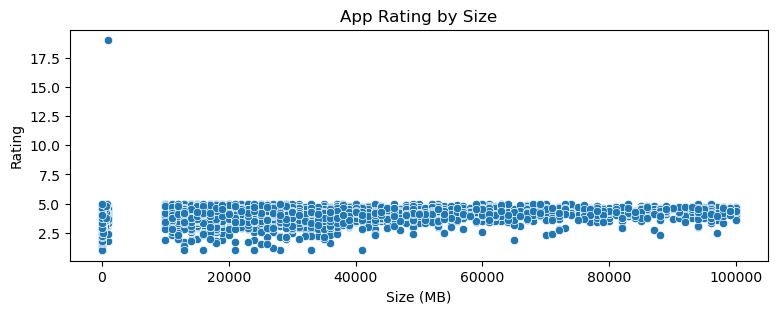

In [146]:

plt.figure(figsize=(9,3))
sns.scatterplot(x='Size',y='Rating',data=df_play)
plt.title('App Rating by Size')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

#### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [102]:
df_play.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [103]:
chars_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']
for items in chars_to_remove:
    for col in columns_to_clean:
        df_play[col] = df_play[col].str.replace(items,'')  

/tmp/ipykernel_84/2236714360.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_play[col] = df_play[col].str.replace(items,'')


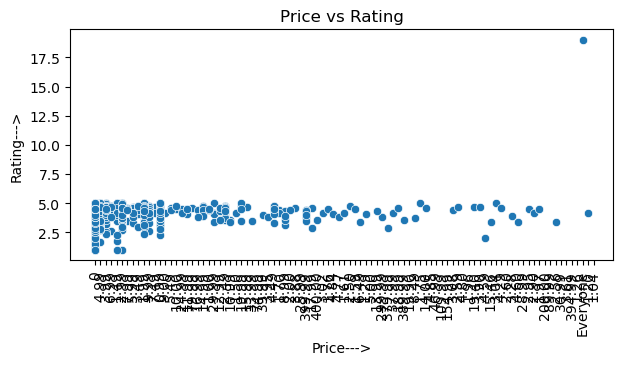

In [153]:
plt.figure(figsize=(7,3))
sns.scatterplot(x='Price',y='Rating',data=df_play)
plt.title('Price vs Rating')
plt.xlabel('Price--->')
plt.xticks(rotation=90)
plt.ylabel('Rating--->')
plt.show()

#### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [114]:
df_play['App'].duplicated().sum()

1181

In [116]:
df_play = df_play.drop_duplicates(subset = ['App'],keep='first')

In [121]:
top_10_apps = df_play.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,Free,19.0
4005,Clean Master- Space Cleaner & Antivirus,500000000,4.7
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,4.7
371,Google Duo - High Quality Video Calls,500000000,4.6
3255,SHAREit - Transfer & Share,500000000,4.6
378,UC Browser - Fast Download Private & Secure,500000000,4.5
1722,My Talking Tom,500000000,4.5
3450,Microsoft Word,500000000,4.5
3703,MX Player,500000000,4.5
1655,Candy Crush Saga,500000000,4.4


In [124]:
pd.DataFrame(list(top_10_apps['App']))

,0
0,Life Made WI-Fi Touchscreen Photo Frame
1,Clean Master- Space Cleaner & Antivirus
2,"Security Master - Antivirus, VPN, AppLock, Boo..."
3,Google Duo - High Quality Video Calls
4,SHAREit - Transfer & Share
5,UC Browser - Fast Download Private & Secure
6,My Talking Tom
7,Microsoft Word
8,MX Player
9,Candy Crush Saga


#### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

<AxesSubplot: title={'center': '<--- Value Count of App Categories--->'}, ylabel='Category'>

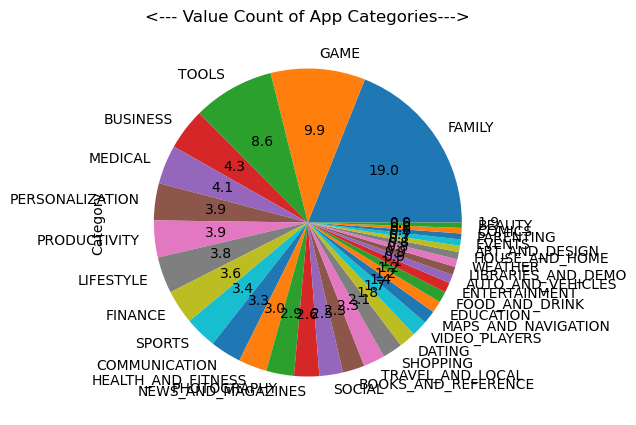

In [141]:
df_play['Category'].value_counts().plot(kind='pie',figsize=(5,5),title='<--- Value Count of App Categories--->',autopct='%1.1f')

/tmp/ipykernel_84/2768134941.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',


<AxesSubplot: title={'center': 'Average Review per category'}, xlabel='Category'>

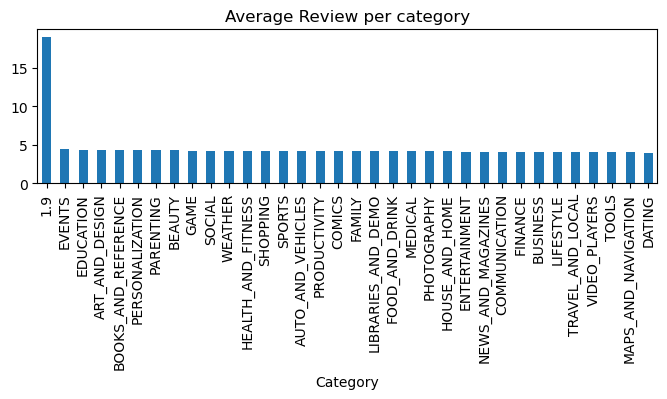

In [144]:
df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',
                                                                                  figsize=(8,2),
                                                                                  title = 'Average Review per category')

#### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

##### Ans.
***To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:***
- Number of downloads: This would indicate how popular an app is among users.

- Rating: A higher rating indicates that users are satisfied with the app.

- Reviews: The number of reviews and the sentiment of those reviews could provide insights into user satisfaction and potential areas for improvement.

- Category: Analyzing the categories in which the apps are listed could help identify the most successful app developers in a specific category.

- Price: The price of the app could provide insights into the developer's pricing strategy.

- App size: The size of the app could impact its popularity and the user experience.

***To present the findings, we could use various data visualizations such as:***
- Bar charts and pie charts to represent the number of downloads and rating of the apps.

- Scatter plots and bubble charts to analyze the correlation between the number of downloads, rating, and price.

- Heat maps to analyze the distribution of apps across different categories.

- Line graphs to represent the trend in the number of reviews over time.

- Tables and charts to compare the performance of different app developers.

- Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, price, and rating.

/tmp/ipykernel_84/579631029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_play.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',figsize=(5,3),title='Genres vs Average Rating')


<AxesSubplot: title={'center': 'Genres vs Average Rating'}, xlabel='Genres'>

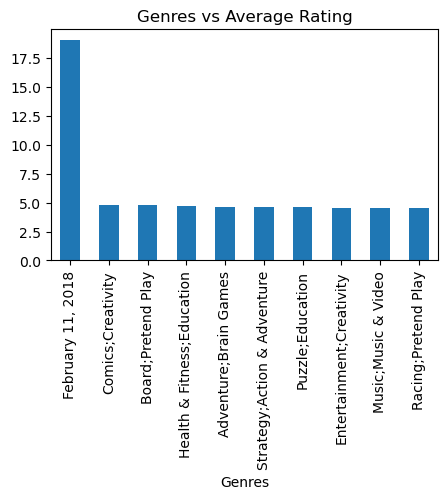

In [156]:
df_play.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',figsize=(5,3),title='Genres vs Average Rating')

/tmp/ipykernel_84/1328134085.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_play.groupby(by='Type').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Type'>

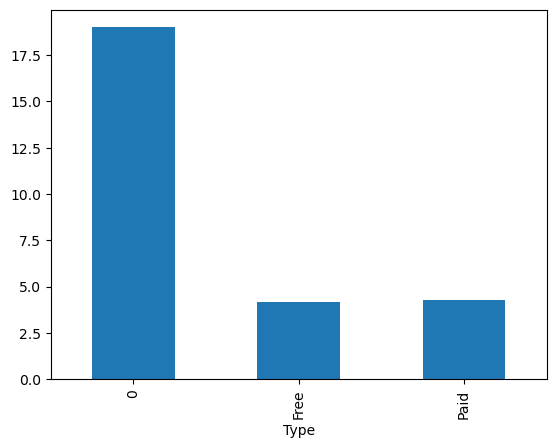

In [157]:
df_play.groupby(by='Type').mean()['Rating'].plot(kind='bar')

#### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

##### Ans>
***To identify the best time to launch a new app, we would need to analyze various features such as:***
- Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

- Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

- Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

- Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

- User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

***To present the findings, we could use various data visualizations such as:***
- Line graphs to represent the trend in the number of downloads, rating, and reviews over time.

- Heat maps to analyze the distribution of app downloads by month and day of the week.

- Bar charts to represent the performance of competing apps in a particular category.

- Scatter plots to analyze the correlation between the number of downloads, rating, and reviews and the time of the year.

- Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, user demographics, and time of the year.

<AxesSubplot: >

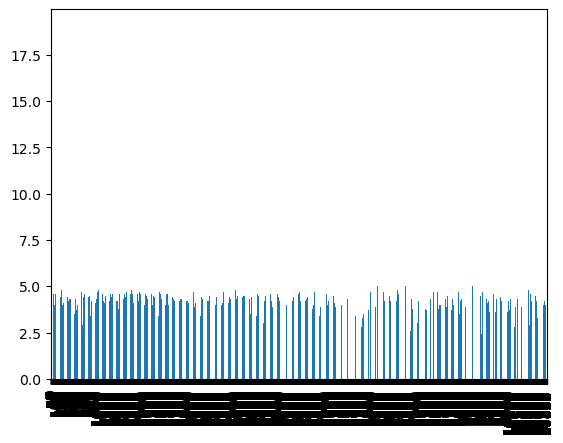

In [3]:
df_play['Rating'].plot(kind='bar')

In [ ]:
df_play.groupby(by='day_name').sum()['Installs'].plot(kind='bar')

In [ ]:
df_play.groupby(by='month').sum()['Installs'].plot(kind='bar')

***Insights :***
- Average Reviews are almost same regardless of month or day of week.
- Most Apps are installed in month of August
- Most Apps are installed in day of week : Thursday
- App installs are increasing rapidly with each year